Importación de librerias

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.model_selection import train_test_split as tts


Importación de csvs

In [3]:
gasnatural = pd.read_csv('clean_data/gasnatural_clean.csv')
uranio = pd.read_csv('clean_data/uranio_clean.csv')
renovables = pd.read_csv('clean_data/renovables_clean.csv')
euaspot = pd.read_csv('clean_data/euaspot.csv')
demanda = pd.read_csv('clean_data/demanda.csv')
co2 = pd.read_csv('data_materias/emisiones_co2.csv')

In [4]:
co2

,Fecha,Último,Apertura,Máximo,Mínimo,Vol.,% var.
0,30.05.2023,"80,38","83,05","83,34","80,36","24,55K","-3,16%"
1,29.05.2023,"83,00","83,01","84,46","82,67","4,74K","-0,16%"
2,26.05.2023,"83,13","82,75","83,37","81,94","14,76K","0,61%"
3,25.05.2023,"82,63","85,03","85,15","82,63","20,74K","-2,55%"
4,24.05.2023,"84,79","85,81","86,26","84,55","13,80K","-1,18%"
...,...,...,...,...,...,...,...
2423,07.01.2014,"4,66","4,65","4,70","4,65","0,02K","1,08%"
2424,06.01.2014,"4,61","4,70","4,70","4,70","0,05K","-1,71%"
2425,03.01.2014,"4,69","4,69","4,69","4,69","0,15K","-0,42%"
2426,02.01.2014,"4,71","4,83","4,83","4,75","0,01K","-4,56%"


In [5]:
# Convertir la columna "Fecha" a tipo datetime
co2['Fecha'] = pd.to_datetime(co2['Fecha'], format='%d.%m.%Y')

# Quedarse solo con la columna "Último"
co2 = co2[['Fecha', 'Último']]

# Sustituir la coma por el punto en la columna "Último"
co2['Último'] = co2['Último'].str.replace(',', '.')

# Convertir la columna "Último" a tipo float
co2['Último'] = co2['Último'].astype(float)

C:\Users\river\AppData\Local\Temp\ipykernel_1156\2495324497.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  co2['Último'] = co2['Último'].str.replace(',', '.')
C:\Users\river\AppData\Local\Temp\ipykernel_1156\2495324497.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  co2['Último'] = co2['Último'].astype(float)


In [6]:
co2

,Fecha,Último
0,2023-05-30,80.38
1,2023-05-29,83.00
2,2023-05-26,83.13
3,2023-05-25,82.63
4,2023-05-24,84.79
...,...,...
2423,2014-01-07,4.66
2424,2014-01-06,4.61
2425,2014-01-03,4.69
2426,2014-01-02,4.71


In [7]:
co2 = co2[co2['Fecha'].dt.year >= 2020]
co2.rename(columns={'Último': 'CO2'}, inplace=True)
co2.rename(columns={'Fecha': 'Date'}, inplace=True)

C:\Users\river\AppData\Local\Temp\ipykernel_1156\4094493045.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  co2.rename(columns={'Último': 'CO2'}, inplace=True)
C:\Users\river\AppData\Local\Temp\ipykernel_1156\4094493045.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  co2.rename(columns={'Fecha': 'Date'}, inplace=True)


In [8]:
gasnatural = gasnatural.drop('Unnamed: 0', axis=1)
uranio = uranio.drop('Unnamed: 0', axis=1)
renovables = renovables.drop('Unnamed: 0', axis=1)
euaspot = euaspot.drop('Unnamed: 0', axis=1)
demanda = demanda.drop('Unnamed: 0', axis=1)


Limpiando eua SPOT

In [9]:
euaspot = euaspot[['value', 'date', 'weekend']]
# Convertir la columna "date" a tipo datetime
euaspot['date'] = pd.to_datetime(euaspot['date'])

# Filtrar a partir de 2020
euaspot = euaspot[euaspot['date'].dt.year >= 2020]

Mergeando

In [10]:
gasnatural.rename(columns={'Close': 'GasNatural'}, inplace=True)
uranio.rename(columns={'Close': 'Uranio'}, inplace=True)

In [11]:
demanda.rename(columns={'Fecha': 'Date'}, inplace=True)
renovables.rename(columns={'Fecha': 'Date'}, inplace=True)
euaspot.rename(columns={'date': 'Date'}, inplace=True)


In [12]:
# Convertir columnas "Date" a tipo "datetime" en cada dataframe
gasnatural['Date'] = pd.to_datetime(gasnatural['Date'])
uranio['Date'] = pd.to_datetime(uranio['Date'])
renovables['Date'] = pd.to_datetime(renovables['Date'])
euaspot['Date'] = pd.to_datetime(euaspot['Date'])
demanda['Date'] = pd.to_datetime(demanda['Date'])

In [13]:
# Combinar los dataframes utilizando la columna "date"
merged_df = pd.merge(demanda, gasnatural, on='Date', how='inner')
merged_df = pd.merge(merged_df, uranio, on='Date', how='inner')
merged_df = pd.merge(merged_df, renovables, on='Date', how='inner')
merged_df = pd.merge(merged_df, euaspot, on='Date', how='inner')
merged_df = pd.merge(merged_df, co2, on='Date', how='inner')


In [14]:
merged_df.tail()

,Date,Demanda,GasNatural,Uranio,Hidráulica,Eólica,Otras renovables,Residuos renovables,Solar,value,weekend,CO2
873,2023-05-23,645.565352,2.586435,2.79,49.7687,183.485746,11.13011,1.210850,79.839465,85.226667,0,85.80
874,2023-05-24,639.567180,2.659774,2.69,48.9835,147.352811,11.48041,1.326450,122.435147,75.883750,0,84.79
875,2023-05-25,640.728355,2.610458,2.64,43.2906,200.653827,11.05631,1.992900,136.767077,65.545833,0,82.63
876,2023-05-26,625.457526,2.545363,2.57,41.6624,210.392500,10.79782,2.282750,102.242471,86.415833,0,83.13
877,2023-05-29,610.504707,2.688613,2.57,50.8219,58.580648,11.76121,2.397725,115.868949,92.531667,0,83.00


In [15]:
merged_df['Month'] = merged_df['Date'].dt.month
merged_df['Weekday'] = merged_df['Date'].dt.weekday
merged_df['Year'] = merged_df['Date'].dt.year



## Demanda vs Price

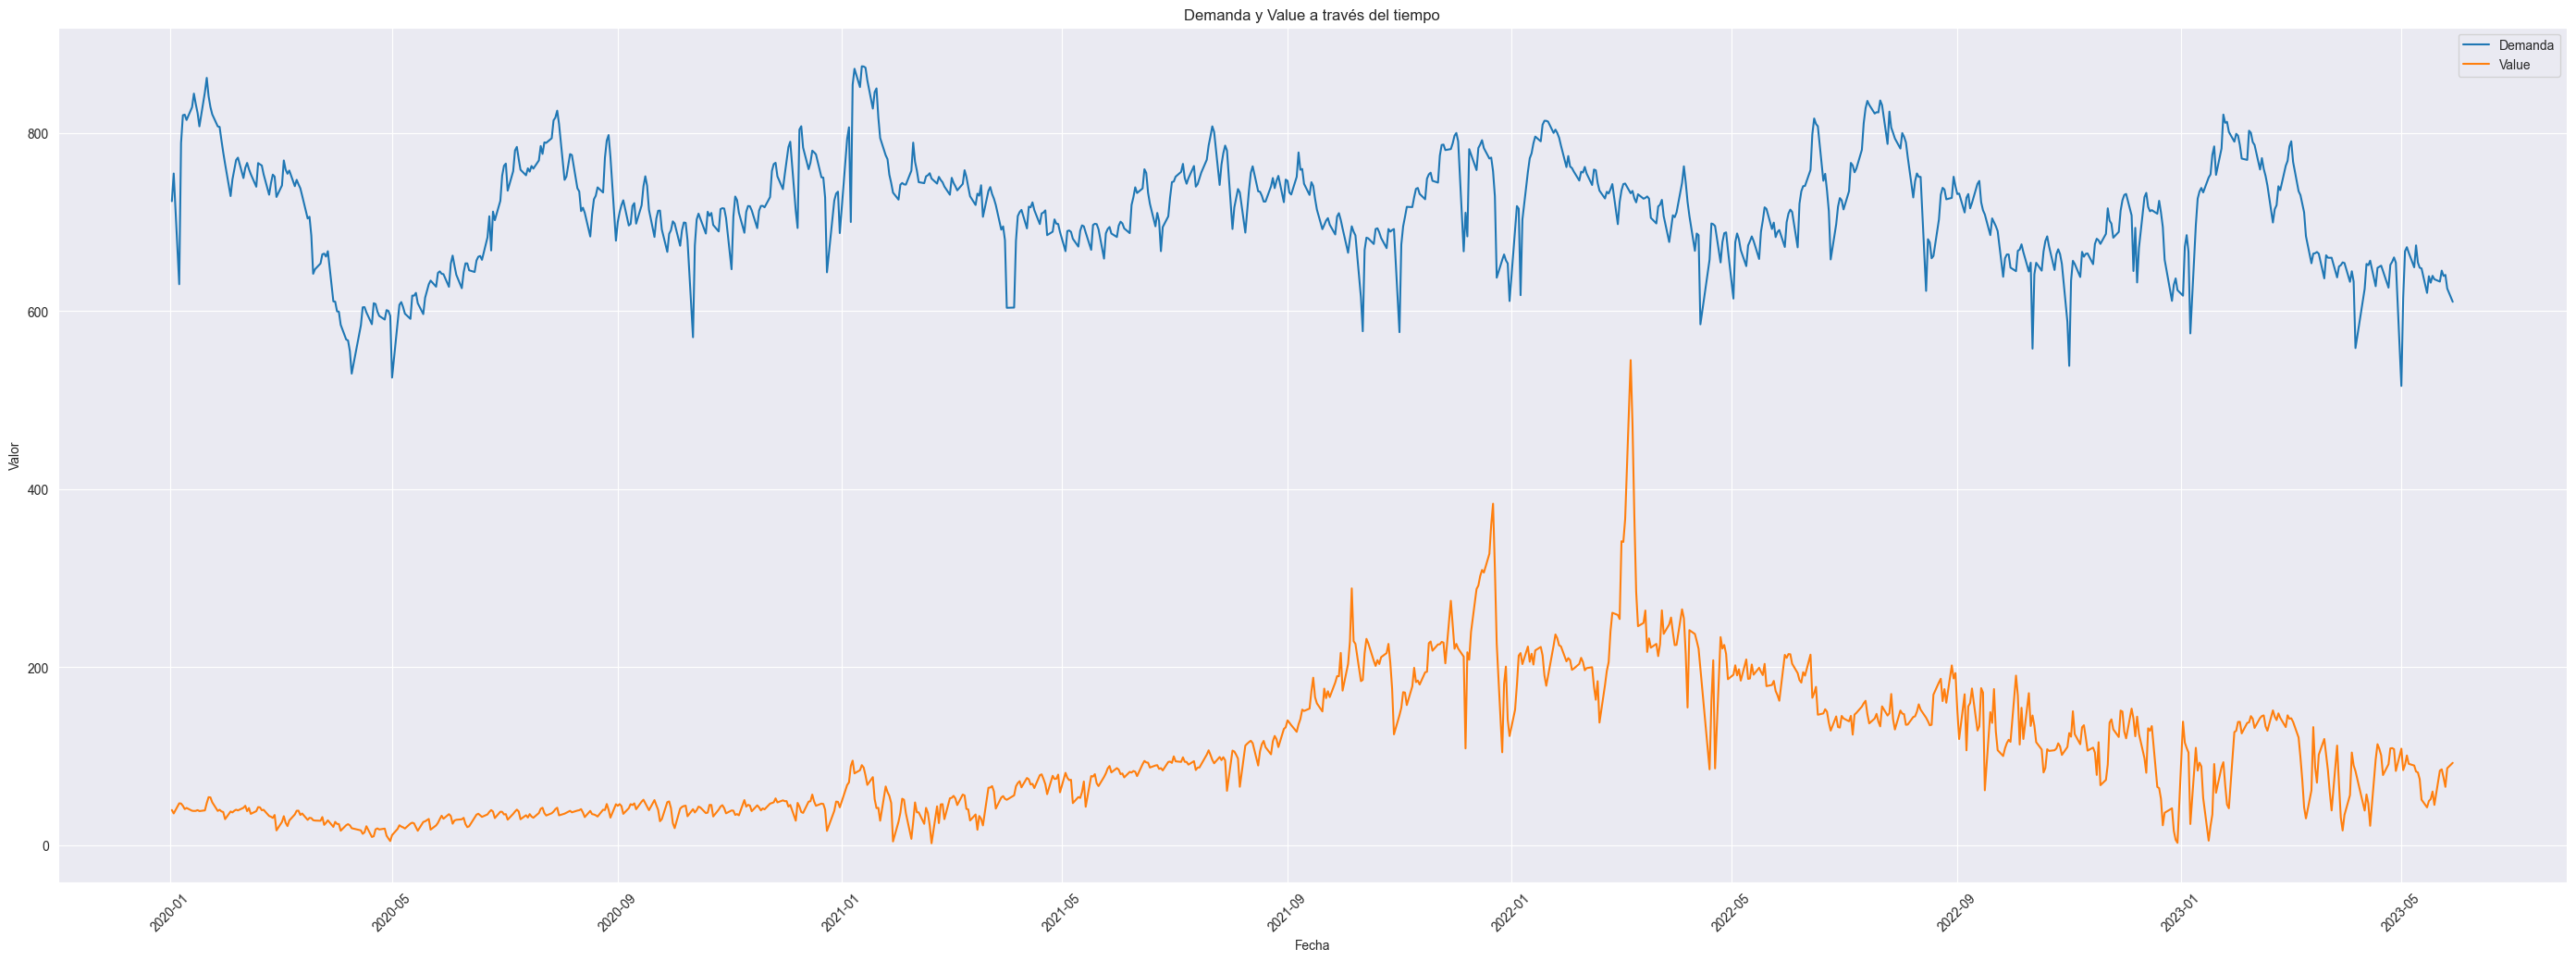

In [16]:
fig = plt.figure(figsize=(35,12))
sns.set_style("darkgrid")

# Graficar la columna "Demanda" utilizando Seaborn
sns.lineplot(data=merged_df, x='Date', y='Demanda', label='Demanda')

# Graficar la columna "value" utilizando Seaborn
sns.lineplot(data=merged_df, x='Date', y='value', label='Value')

# Configurar el título y las etiquetas de los ejes
plt.title('Demanda y Value a través del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Valor')

# Rotar las etiquetas del eje x para una mejor visualización
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

## Gas Natural vs Price

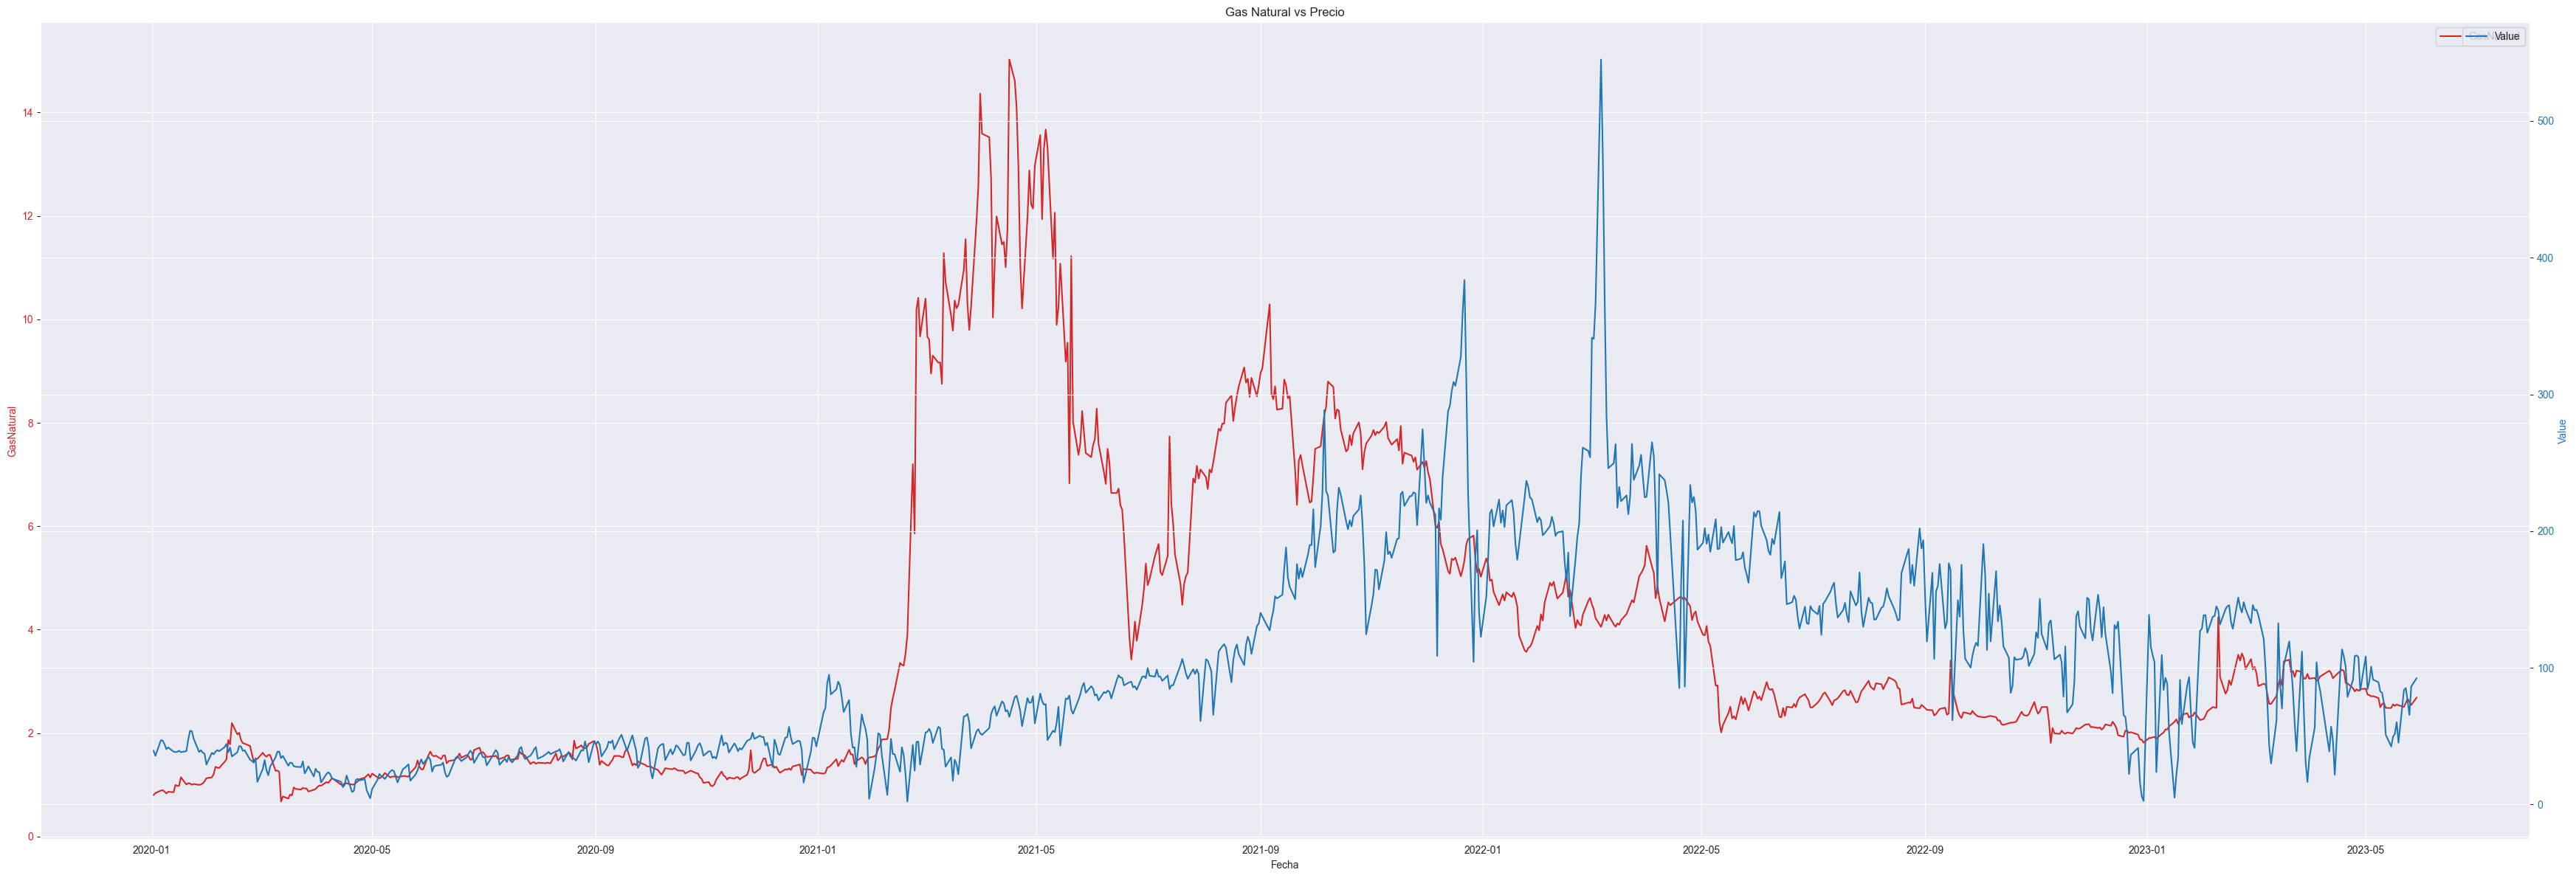

In [17]:
fig, ax1 = plt.subplots(figsize=(35, 12))
sns.set_style("darkgrid")

# Graficar la columna "GasNatural" en el primer eje
color1 = 'tab:red'
ax1.set_xlabel('Fecha')
ax1.set_ylabel('GasNatural', color=color1)
ax1 = sns.lineplot(data=merged_df, x='Date', y='GasNatural', label='GasNatural', color=color1)
ax1.tick_params(axis='y', labelcolor=color1)

# Crear el segundo eje y asignarlo a la columna "value"
ax2 = ax1.twinx()
color2 = 'tab:blue'
ax2.set_ylabel('Value', color=color2)
ax2 = sns.lineplot(data=merged_df, x='Date', y='value', label='Value', color=color2)
ax2.tick_params(axis='y', labelcolor=color2)

# Configurar el título
plt.title('Gas Natural vs Precio')

# Rotar las etiquetas del eje x para una mejor visualización
plt.xticks(rotation=45)

# Ajustar el espaciado entre subplots para evitar superposiciones
fig.tight_layout()

# Mostrar el gráfico
plt.show()


## Uranio vs Precio

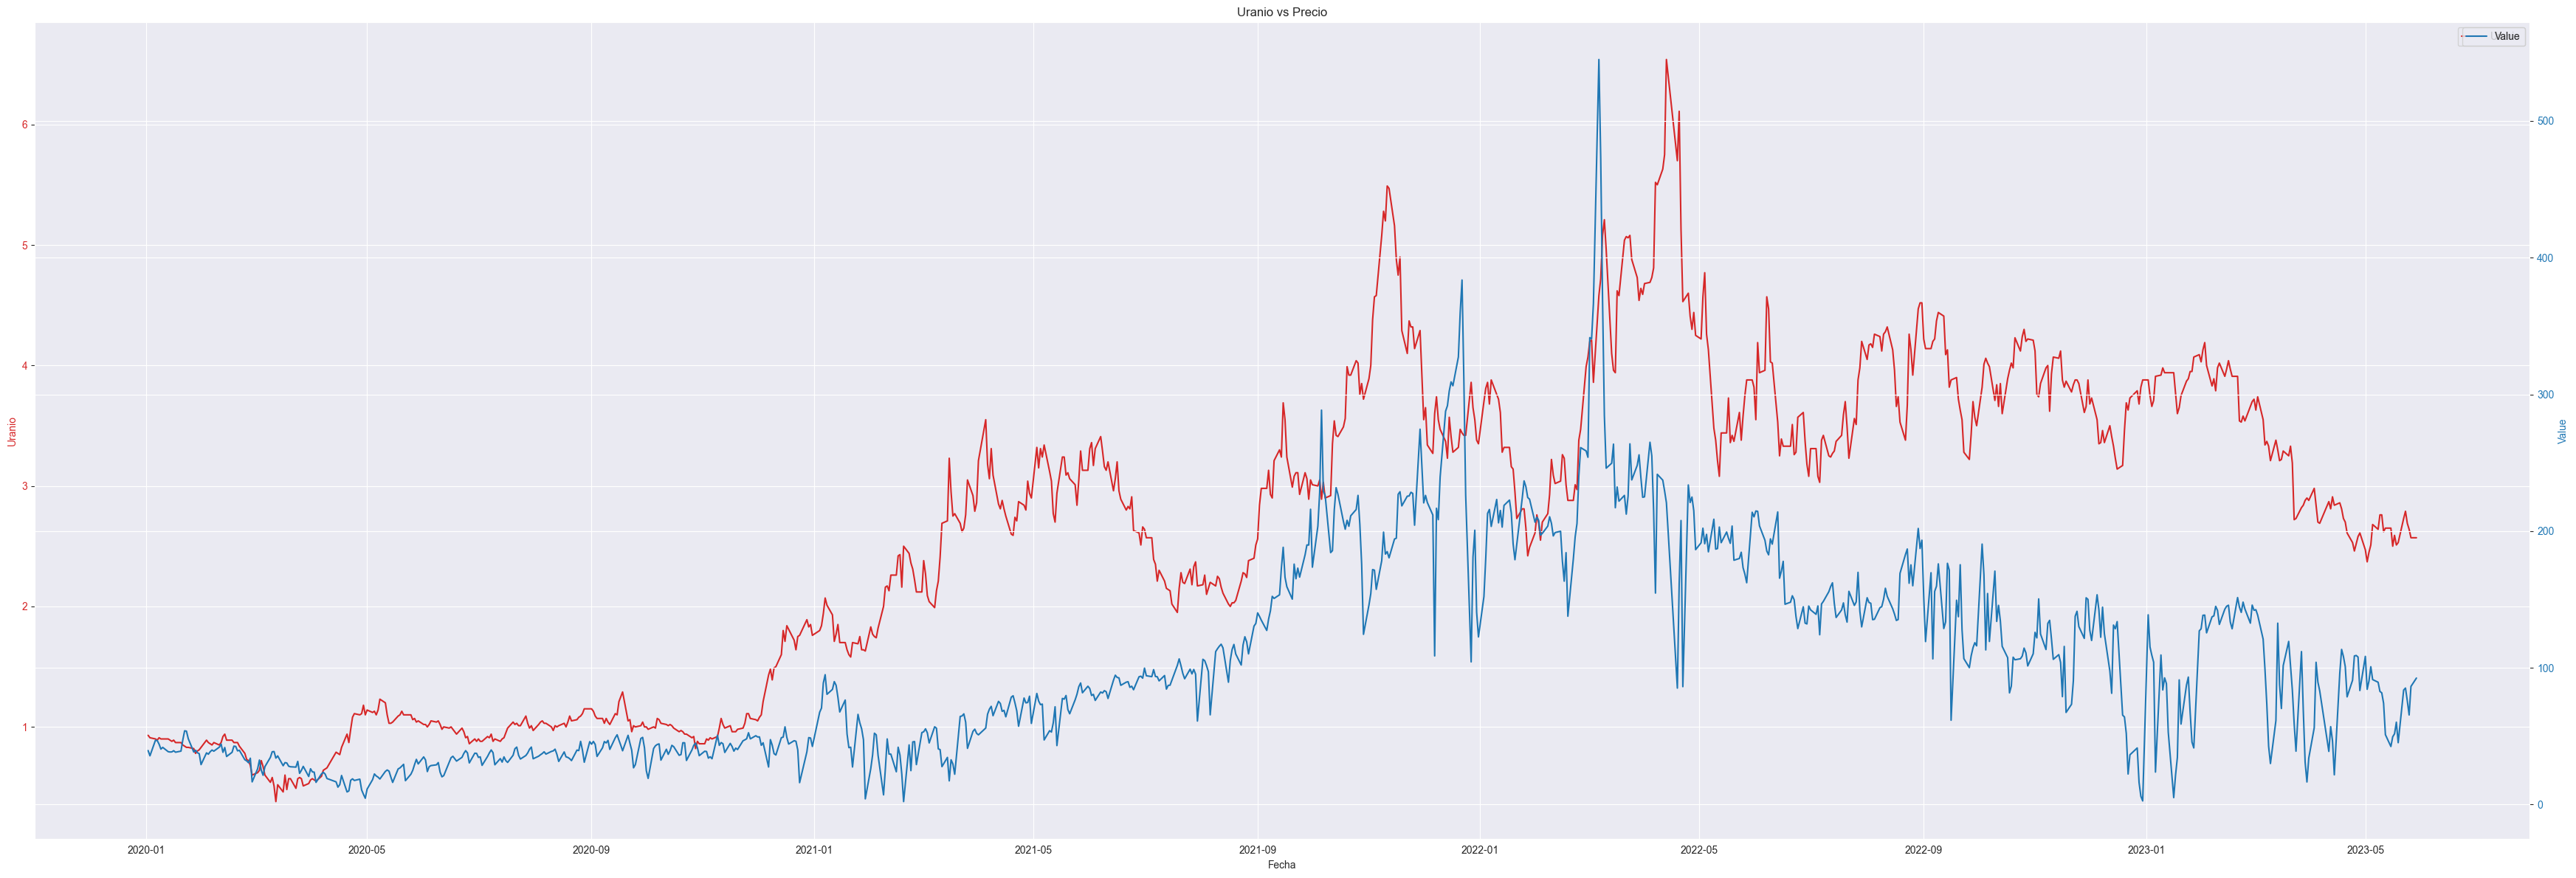

In [18]:
fig, ax1 = plt.subplots(figsize=(35, 12))
sns.set_style("darkgrid")

# Graficar la columna "GasNatural" en el primer eje
color1 = 'tab:red'
ax1.set_xlabel('Fecha')
ax1.set_ylabel('Uranio', color=color1)
ax1 = sns.lineplot(data=merged_df, x='Date', y='Uranio', label='Uranio', color=color1)
ax1.tick_params(axis='y', labelcolor=color1)

# Crear el segundo eje y asignarlo a la columna "value"
ax2 = ax1.twinx()
color2 = 'tab:blue'
ax2.set_ylabel('Value', color=color2)
ax2 = sns.lineplot(data=merged_df, x='Date', y='value', label='Value', color=color2)
ax2.tick_params(axis='y', labelcolor=color2)

# Configurar el título
plt.title('Uranio vs Precio')

# Rotar las etiquetas del eje x para una mejor visualización
plt.xticks(rotation=45)

# Ajustar el espaciado entre subplots para evitar superposiciones
fig.tight_layout()

# Mostrar el gráfico
plt.show()

## C02 vs Price

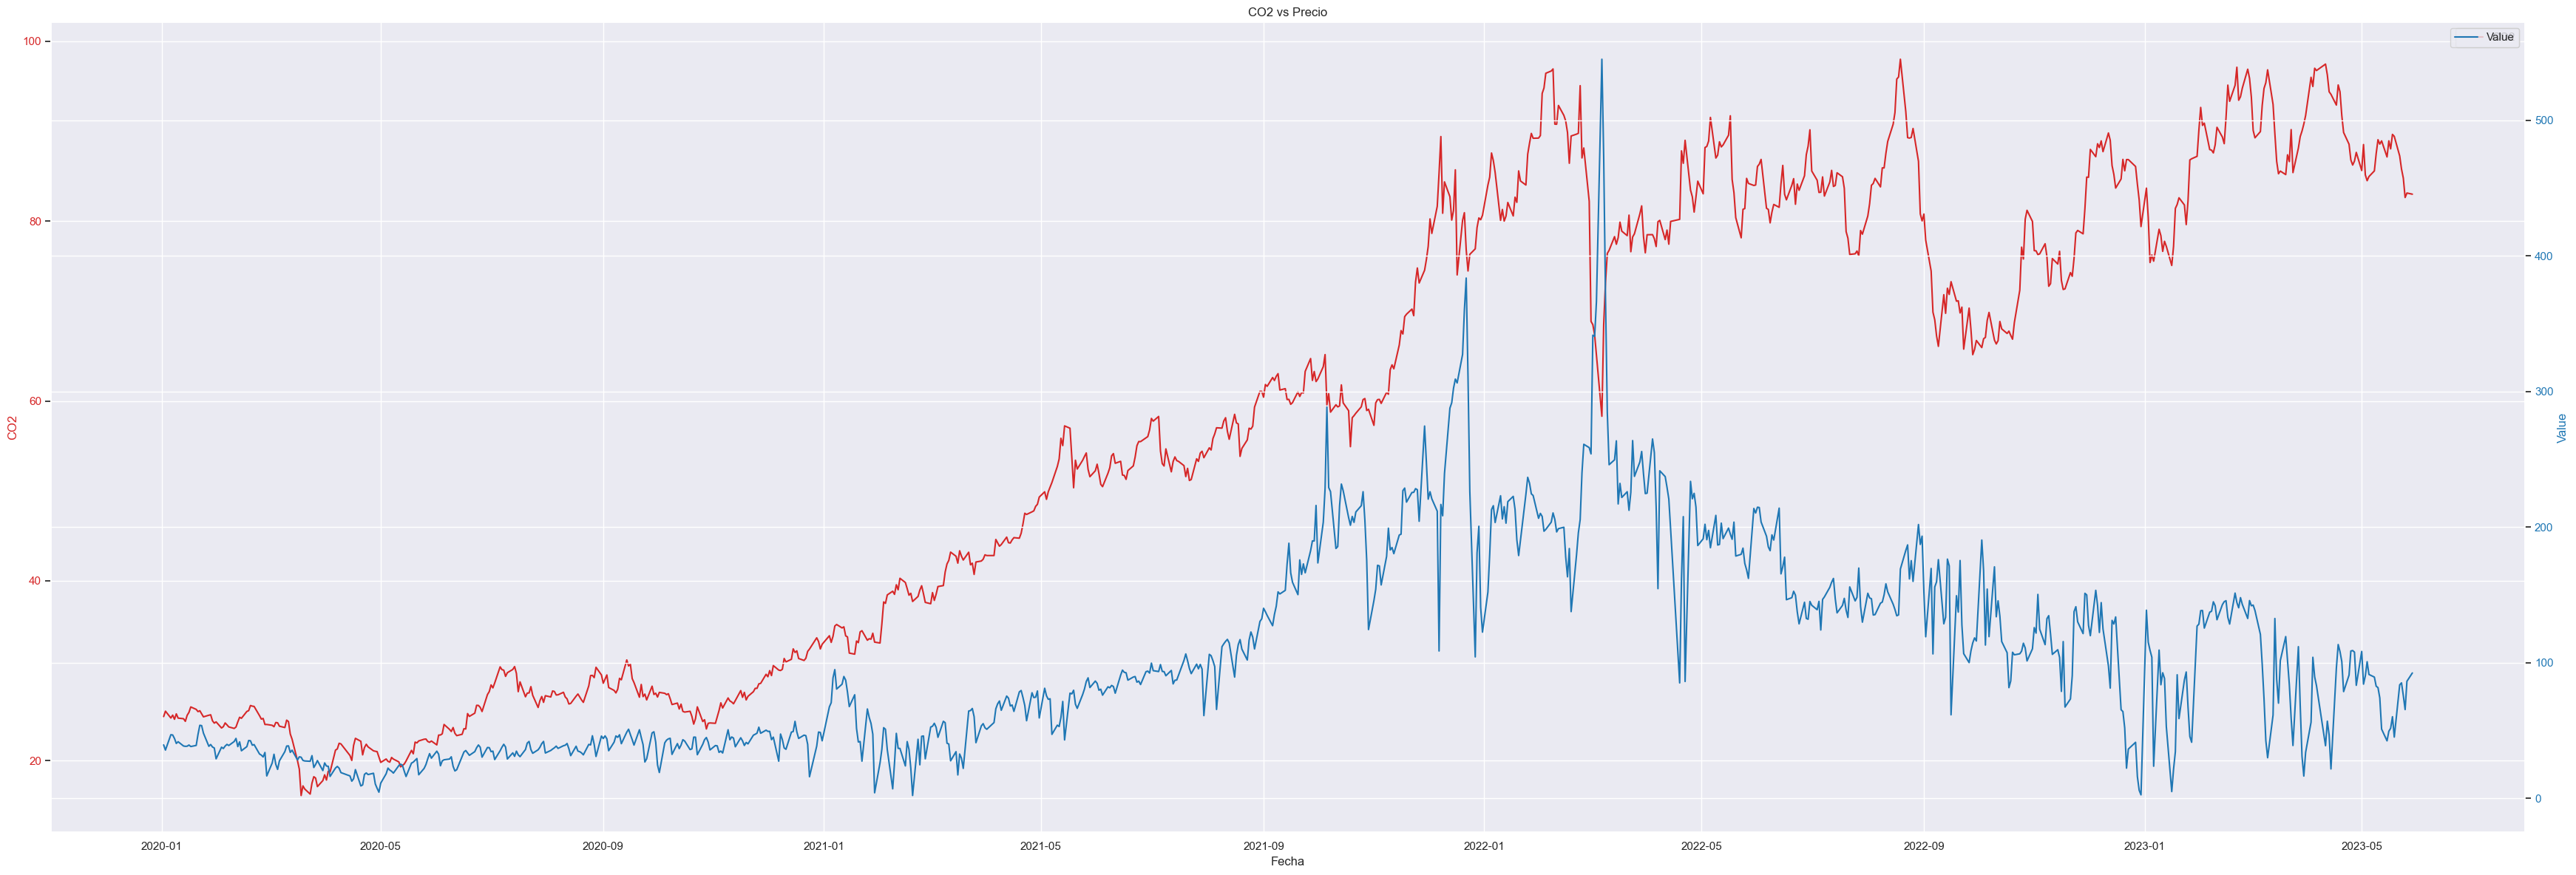

In [96]:
fig, ax1 = plt.subplots(figsize=(35, 12))
sns.set_style("darkgrid")

# Graficar la columna "GasNatural" en el primer eje
color1 = 'tab:red'
ax1.set_xlabel('Fecha')
ax1.set_ylabel('CO2', color=color1)
ax1 = sns.lineplot(data=merged_df, x='Date', y='CO2', label='CO2', color=color1)
ax1.tick_params(axis='y', labelcolor=color1)

# Crear el segundo eje y asignarlo a la columna "value"
ax2 = ax1.twinx()
color2 = 'tab:blue'
ax2.set_ylabel('Value', color=color2)
ax2 = sns.lineplot(data=merged_df, x='Date', y='value', label='Value', color=color2)
ax2.tick_params(axis='y', labelcolor=color2)

# Configurar el título
plt.title('CO2 vs Precio')

# Rotar las etiquetas del eje x para una mejor visualización
plt.xticks(rotation=45)

# Ajustar el espaciado entre subplots para evitar superposiciones
fig.tight_layout()

# Mostrar el gráfico
plt.show()

### Dickey-Fuller Test

In [20]:
y = merged_df['value']
adf_test = adfuller(y, regression='c')
print('ADF Statistic: {:.6f}\np-value: {:.6f}\n#Lags used: {}'
      .format(adf_test[0], adf_test[1], adf_test[2]))
for key, value in adf_test[4].items():
    print('Critical Value ({}): {:.6f}'.format(key, value))

ADF Statistic: -1.738849
p-value: 0.411216
#Lags used: 15
Critical Value (1%): -3.437959
Critical Value (5%): -2.864899
Critical Value (10%): -2.568558


Los resultados de la prueba de raíz unitaria (ADF) proporcionan información sobre la estacionariedad de una serie de tiempo. Aquí está la interpretación de los resultados:

- ADF Statistic: El valor de estadística ADF es -1.759151. Este valor negativo indica que la serie de tiempo tiene una tendencia decreciente, pero no nos dice si es estacionaria o no.

- p-value: El valor p obtenido es 0.400922. Este valor representa la probabilidad de obtener un valor de estadística ADF igual o más extremo que el observado, si la serie de tiempo fuera en realidad no estacionaria. En este caso, el valor p es mayor que el nivel de significancia comúnmente utilizado de 0.05. Por lo tanto, no tenemos suficiente evidencia para rechazar la hipótesis nula de que la serie de tiempo tiene una raíz unitaria y no es estacionaria.

Lags used: El número de rezagos utilizados en la prueba es 21. Los rezagos se incluyen en la prueba para capturar la dependencia temporal en la serie de tiempo.

- Critical Values: Estos valores representan los límites críticos correspondientes a diferentes niveles de confianza. Si el valor de estadística ADF es menor que estos valores críticos, podemos rechazar la hipótesis nula de no estacionariedad. En este caso, el valor de estadística ADF (-1.759151) es mayor que los valores críticos para todos los niveles de confianza (1%, 5% y 10%). Esto respalda aún más la idea de que la serie de tiempo no es estacionaria.

En resumen, los resultados indican que la serie de tiempo no es estacionaria, ya que no hay suficiente evidencia para rechazar la hipótesis nula de presencia de una raíz unitaria.

### Correlaciones

In [21]:
# Find the correlations between the energy price and the rest of the features

correlations = merged_df.corr(method='pearson')
print(correlations['value'].sort_values(ascending=False).to_string())

value                  1.000000
Uranio                 0.726070
CO2                    0.664359
Year                   0.478945
Otras renovables       0.428290
Residuos renovables    0.359140
GasNatural             0.276612
Solar                  0.145636
Demanda                0.140289
Month                  0.103607
Eólica                -0.025238
Weekday               -0.047840
Hidráulica            -0.412660
weekend                     NaN


C:\Users\river\AppData\Local\Temp\ipykernel_1156\3620804181.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = merged_df.corr(method='pearson')


Ploting

In [22]:
merged_df.columns

Index(['Date', 'Demanda', 'GasNatural', 'Uranio', 'Hidráulica', 'Eólica',
       'Otras renovables', 'Residuos renovables', 'Solar', 'value', 'weekend',
       'CO2', 'Month', 'Weekday', 'Year'],
      dtype='object')

In [23]:
considered_features = ['Demanda', 'GasNatural', 'Hidráulica', 'Eólica',
       'Otras renovables', 'Residuos renovables', 'Solar', 'weekend', 'Month', 'Weekday', 'CO2']

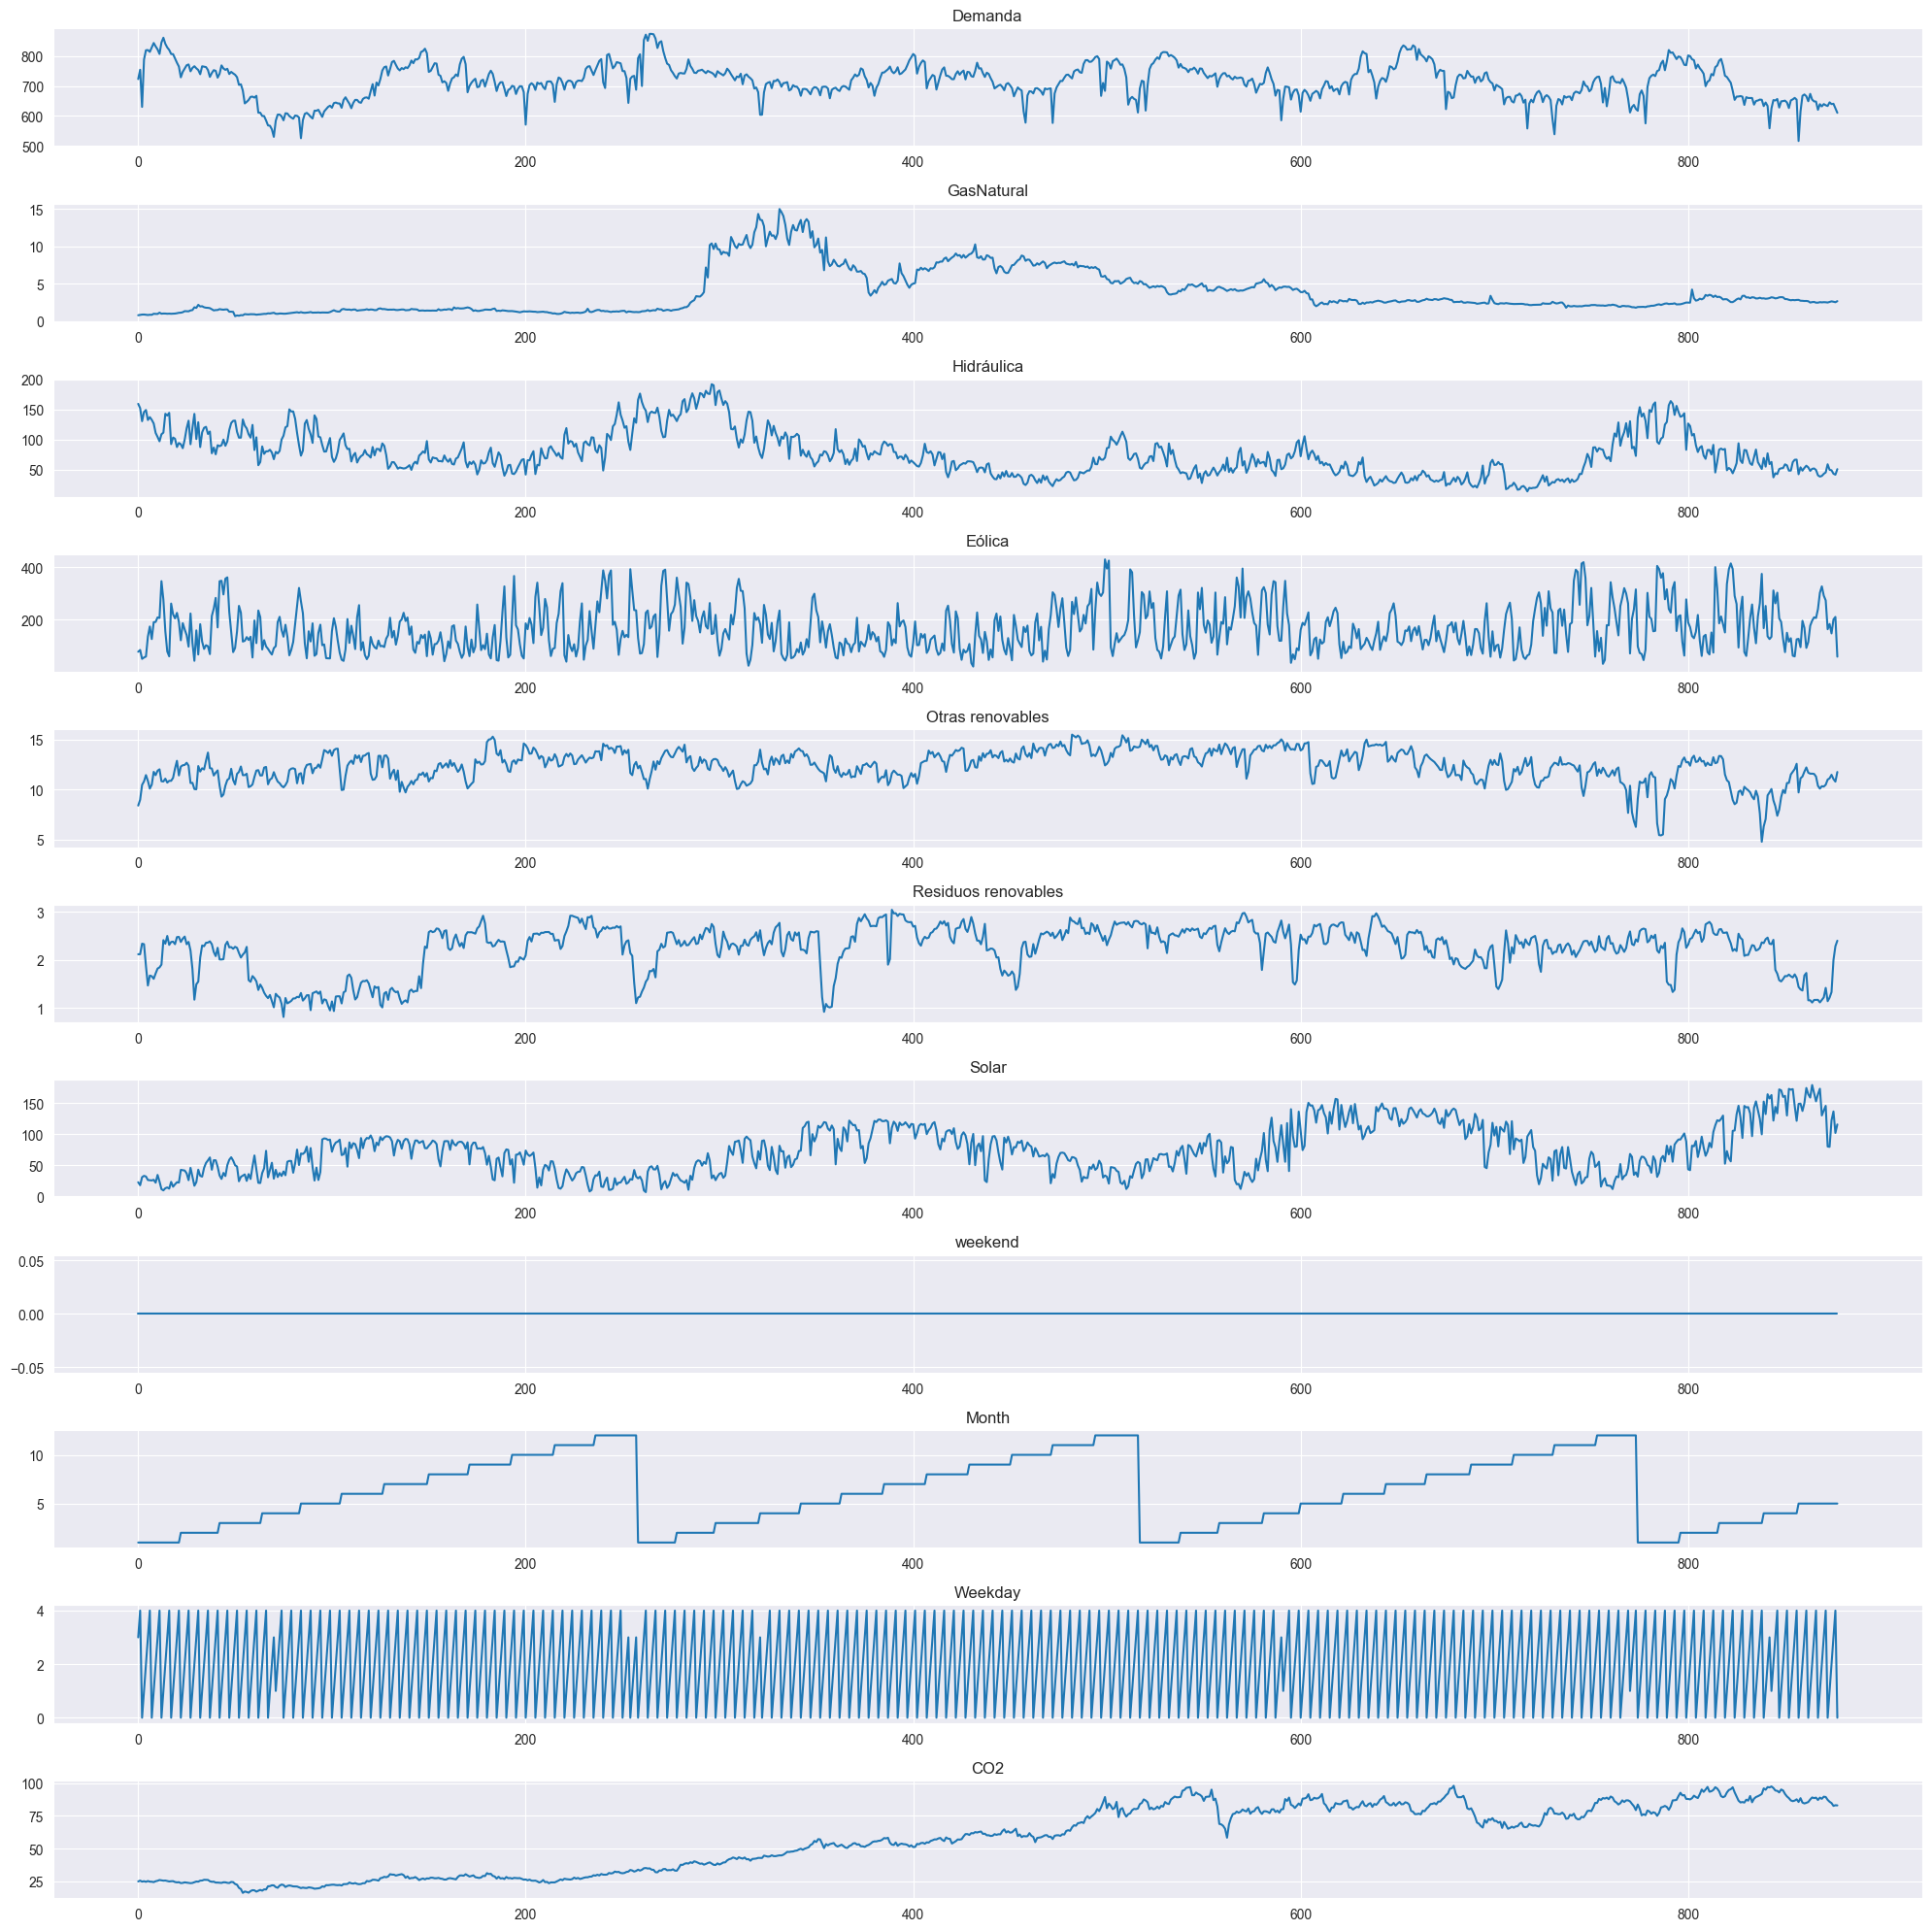

In [24]:
values = merged_df[considered_features].values

# Plot time-series of considered features
plt.figure(figsize=(20, 20))
for i in range(values.shape[1]):
    plt.subplot(values.shape[1], 1, i+1)
    plt.plot(values[:, i])
    plt.title(considered_features[i]) 
plt.tight_layout()
plt.show()


### Correlación y Autocorrelación

c:\Users\river\anaconda3\envs\ML\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


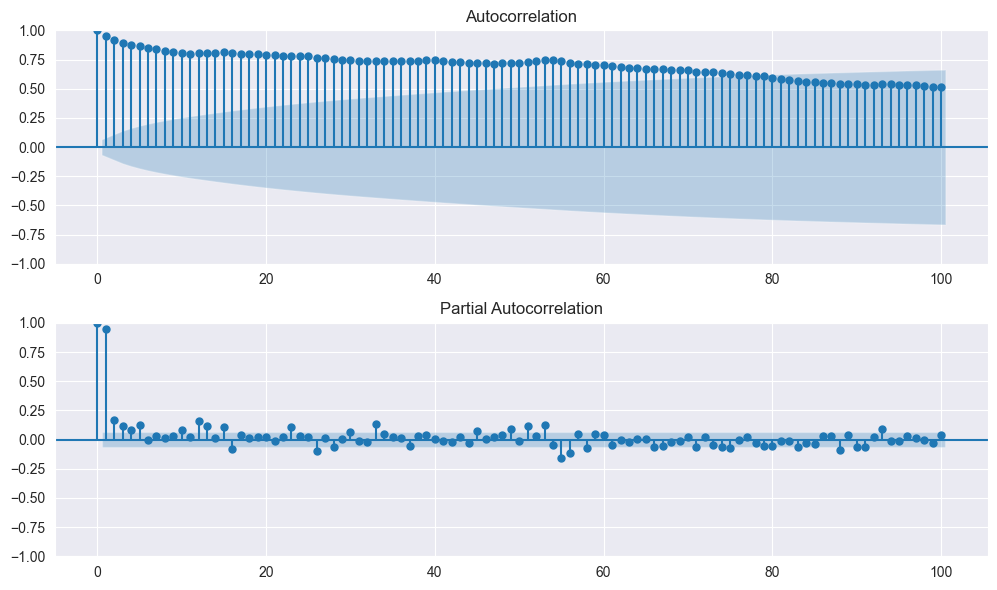

In [25]:
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(10, 6))
plot_acf(merged_df['value'], lags=100, ax=ax1)
plot_pacf(merged_df['value'], lags=100, ax=ax2)
plt.tight_layout()
plt.show()

El gráfico de autocorrelación (ACF) y el gráfico de autocorrelación parcial (PACF) son herramientas que se utilizan para analizar la correlación y dependencia temporal en una serie de tiempo.

En el gráfico de autocorrelación (ACF), el eje x representa los lags, es decir, los desplazamientos en el tiempo. El eje y representa el valor de correlación entre la serie de tiempo y su versión desplazada. Cada barra en el gráfico de ACF representa la correlación entre la serie de tiempo y su versión desplazada en un lag específico. La altura de cada barra indica el nivel de correlación. Un ACF que decae gradualmente sugiere una serie de tiempo estacionaria, mientras que los picos significativos en el ACF pueden indicar una dependencia temporal.

En el gráfico de autocorrelación parcial (PACF), también se representa la correlación en función del lag. Sin embargo, en este caso, se eliminan los efectos indirectos de los lags intermedios. La altura de cada barra en el gráfico de PACF indica la correlación parcial entre la serie de tiempo y su versión desplazada en un lag específico, después de eliminar la influencia de los lags intermedios. Los picos significativos en el PACF pueden indicar componentes de autocorrelación directa en la serie de tiempo.

Un pico significativo en el ACF en el lag 1 indica una fuerte correlación entre los valores actuales y los valores en el período anterior. Un pico significativo en el PACF en el lag 1 indica una correlación directa entre los valores actuales y los valores en el período anterior, después de eliminar la influencia de los lags intermedios.

## Train Test Split

In [26]:
merged_df.columns

Index(['Date', 'Demanda', 'GasNatural', 'Uranio', 'Hidráulica', 'Eólica',
       'Otras renovables', 'Residuos renovables', 'Solar', 'value', 'weekend',
       'CO2', 'Month', 'Weekday', 'Year'],
      dtype='object')

In [27]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 878 entries, 0 to 877
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 878 non-null    datetime64[ns]
 1   Demanda              878 non-null    float64       
 2   GasNatural           878 non-null    float64       
 3   Uranio               878 non-null    float64       
 4   Hidráulica           878 non-null    float64       
 5   Eólica               878 non-null    float64       
 6   Otras renovables     878 non-null    float64       
 7   Residuos renovables  878 non-null    float64       
 8   Solar                878 non-null    float64       
 9   value                878 non-null    float64       
 10  weekend              878 non-null    int64         
 11  CO2                  878 non-null    float64       
 12  Month                878 non-null    int64         
 13  Weekday              878 non-null  

In [28]:
X = merged_df.drop(columns=['value','Date', 'weekend', 'Weekday'], axis=1)

y = merged_df.value 

In [29]:
X_train, X_test, y_train, y_test = tts(X, y, 
                                       test_size=5,
                                       shuffle=False  # que no mezcle de manera aleatoria 
                                      )


X_train.shape, X_test.shape, y_train.shape, y_test.shape

((873, 11), (5, 11), (873,), (5,))

# 1. Random Forest Regressor

In [30]:
from sklearn.ensemble import RandomForestRegressor as RFR  
from sklearn.metrics import mean_squared_error as mse

In [31]:
rfr=RFR()
rfr.fit(X_train, y_train)

RandomForestRegressor()

In [32]:
y_pred = rfr.predict(X_test)

In [33]:
mse(y_test, y_pred, squared=False)  # RMSE

19.449696377366934

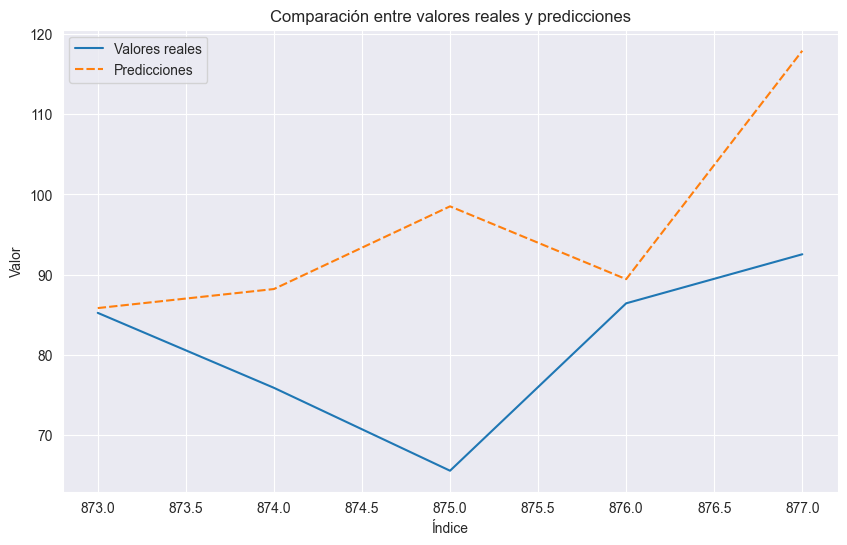

In [34]:
# Crear un dataframe con los valores reales y las predicciones
results_df = pd.DataFrame({'Valores reales': y_test, 'Predicciones': y_pred})

# Graficar los valores reales y las predicciones
plt.figure(figsize=(10, 6))
sns.lineplot(data=results_df)
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.title('Comparación entre valores reales y predicciones')
plt.show()

In [35]:
# Obtener todas las fechas excepto los últimos 5 registros
fechas_entrenamiento = merged_df['Date'][:-5]

# Obtener las últimas 5 fechas para el conjunto de prueba
fechas_prueba = merged_df['Date'][-5:]

# Crear un dataframe con las fechas y las predicciones
predicciones_df = pd.DataFrame({'Fecha': fechas_entrenamiento.append(fechas_prueba), 'Predicciones': np.concatenate((rfr.predict(X_train), y_pred))})

C:\Users\river\AppData\Local\Temp\ipykernel_1156\723488003.py:8: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicciones_df = pd.DataFrame({'Fecha': fechas_entrenamiento.append(fechas_prueba), 'Predicciones': np.concatenate((rfr.predict(X_train), y_pred))})


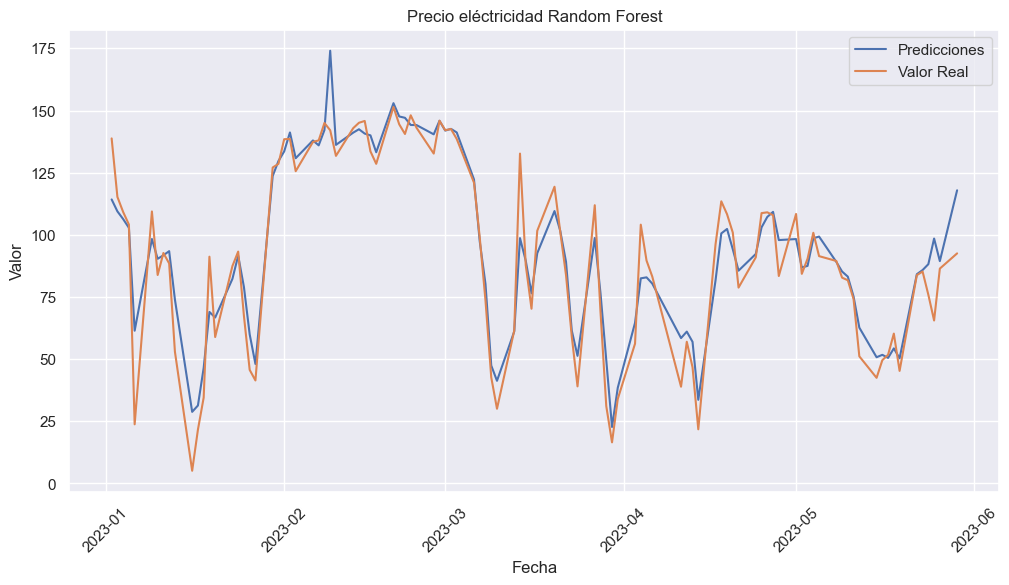

In [36]:
# Filtrar las fechas del año 2023
predicciones_2023 = predicciones_df[predicciones_df['Fecha'].dt.year == 2023]
merged_2023 = merged_df[merged_df['Date'].dt.year == 2023]

# Configurar estilo de seaborn
sns.set(style="darkgrid")

# Crear el gráfico
plt.figure(figsize=(12, 6))
sns.lineplot(x='Fecha', y='Predicciones', data=predicciones_2023, label='Predicciones')
sns.lineplot(x='Date', y='value', data=merged_2023, label='Valor Real')

# Configurar etiquetas y título del gráfico
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.title('Precio eléctricidad Random Forest')

# Rotar las etiquetas del eje x para mejorar la legibilidad
plt.xticks(rotation=45)

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.show()


# 2. XGB Regressor

In [37]:
from xgboost import XGBRegressor as XGBR

In [38]:
xgbr=XGBR()
xgbr.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [39]:
y_pred=xgbr.predict(X_test)

mse(y_test, y_pred, squared=False)  # RMSE

15.225422236712806

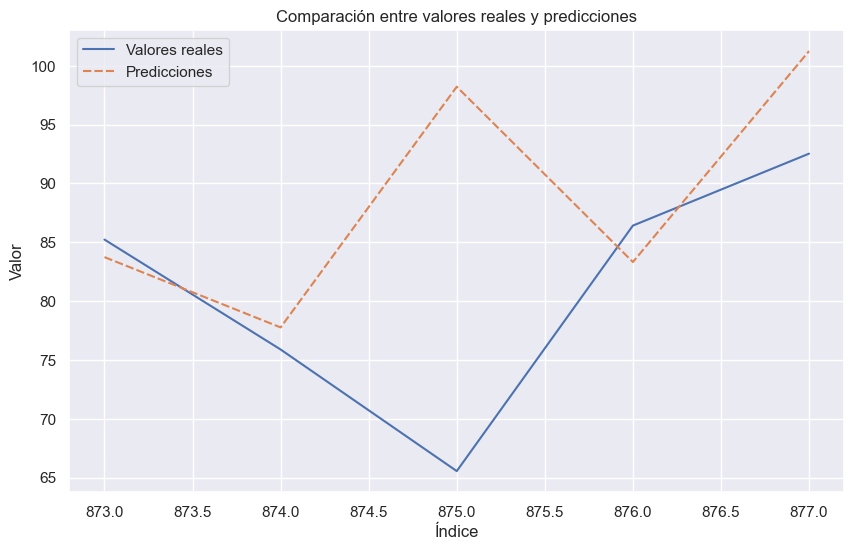

C:\Users\river\AppData\Local\Temp\ipykernel_1156\3931671542.py:19: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicciones_df = pd.DataFrame({'Fecha': fechas_entrenamiento.append(fechas_prueba), 'Predicciones': np.concatenate((rfr.predict(X_train), y_pred))})


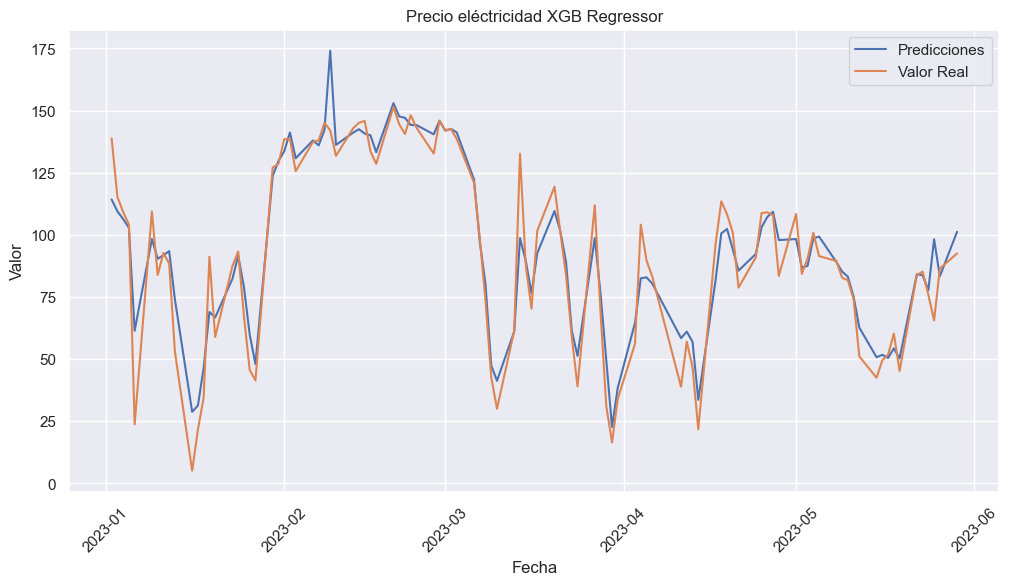

In [40]:
# Crear un dataframe con los valores reales y las predicciones
results_df = pd.DataFrame({'Valores reales': y_test, 'Predicciones': y_pred})

# Graficar los valores reales y las predicciones
plt.figure(figsize=(10, 6))
sns.lineplot(data=results_df)
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.title('Comparación entre valores reales y predicciones')
plt.show()

# Obtener todas las fechas excepto los últimos 5 registros
fechas_entrenamiento = merged_df['Date'][:-5]

# Obtener las últimas 5 fechas para el conjunto de prueba
fechas_prueba = merged_df['Date'][-5:]

# Crear un dataframe con las fechas y las predicciones
predicciones_df = pd.DataFrame({'Fecha': fechas_entrenamiento.append(fechas_prueba), 'Predicciones': np.concatenate((rfr.predict(X_train), y_pred))})
# Filtrar las fechas del año 2023
predicciones_2023 = predicciones_df[predicciones_df['Fecha'].dt.year == 2023]
merged_2023 = merged_df[merged_df['Date'].dt.year == 2023]

# Configurar estilo de seaborn
sns.set(style="darkgrid")

# Crear el gráfico
plt.figure(figsize=(12, 6))
sns.lineplot(x='Fecha', y='Predicciones', data=predicciones_2023, label='Predicciones')
sns.lineplot(x='Date', y='value', data=merged_2023, label='Valor Real')

# Configurar etiquetas y título del gráfico
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.title('Precio eléctricidad XGB Regressor')

# Rotar las etiquetas del eje x para mejorar la legibilidad
plt.xticks(rotation=45)

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.show()


## Linear Regression

In [41]:
from sklearn.linear_model import LinearRegression as LinReg   # alias es mio
linreg=LinReg()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)
mse(y_test, y_pred, squared=False) 

13.455828956404984

# Intento de Red Neuronal

In [42]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.neural_network import MLPRegressor



Transformacion

In [44]:
merged_df.columns


Index(['Date', 'Demanda', 'GasNatural', 'Uranio', 'Hidráulica', 'Eólica',
       'Otras renovables', 'Residuos renovables', 'Solar', 'value', 'weekend',
       'CO2', 'Month', 'Weekday', 'Year'],
      dtype='object')

In [45]:
numeric_cols = X_train.select_dtypes(include=['float64', 'int']).columns.to_list()

In [46]:
# Transformaciones para las variables numéricas
numeric_transformer = Pipeline(
                        steps=[('scaler', StandardScaler())]
                      )

preprocessor = ColumnTransformer(
                    transformers=[
                        ('numeric', numeric_transformer, numeric_cols)],
                    remainder='passthrough'
                )

In [47]:
# Se aprenden y aplican las transformaciones de preprocesado
# ==============================================================================
X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep  = preprocessor.transform(X_test)

In [48]:
labels = numeric_cols
datos_train_prep = preprocessor.transform(X_train)
datos_train_prep = pd.DataFrame(datos_train_prep, columns=labels)
datos_train_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 873 entries, 0 to 872
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Demanda              873 non-null    float64
 1   GasNatural           873 non-null    float64
 2   Uranio               873 non-null    float64
 3   Hidráulica           873 non-null    float64
 4   Eólica               873 non-null    float64
 5   Otras renovables     873 non-null    float64
 6   Residuos renovables  873 non-null    float64
 7   Solar                873 non-null    float64
 8   CO2                  873 non-null    float64
 9   Month                873 non-null    float64
 10  Year                 873 non-null    float64
dtypes: float64(11)
memory usage: 75.1 KB


In [49]:
# Se combinan los pasos de preprocesado y el modelo en un mismo pipeline
pipe = Pipeline([('preprocessing', preprocessor),
                 ('modelo', MLPRegressor(solver = 'lbfgs', max_iter= 1000))])

# "lbfgs" se utiliza para optimizar los pesos de la red neuronal durante el entrenamiento.

In [50]:
from sklearn.model_selection import RandomizedSearchCV
import multiprocessing



In [51]:
# Espacio de búsqueda de cada hiperparámetro
# ==============================================================================
param_distributions = {
    'modelo__hidden_layer_sizes': [(10), (20), (10, 10)], #una capa oculta con 10 neuronas otra con 20 y dos capas con 10 neuronas cada una
    'modelo__alpha': np.logspace(-3, 3, 10),  #controla la regularización, es decir el overfiteo
    'modelo__learning_rate_init': [0.001, 0.01], #tasa de aprendizaje 
}

# Búsqueda por validación cruzada
# ==============================================================================
grid = RandomizedSearchCV(
        estimator  = pipe,  #modelo utilizado
        param_distributions = param_distributions,  #probar por cada parametro
        n_iter     = 50,  # numero de combinaciones de hiperparametros
        scoring    = 'neg_mean_squared_error',  # para evaluar
        n_jobs     = multiprocessing.cpu_count() - 1,  # todos los nucleos de la cpu - 1
        cv         = 5,  # validación cruzada de 5 folds, el conjunto de datos se divide en 5 partes iguales
        verbose    = 0,
        random_state = 123,
        return_train_score = True
       )

grid.fit(X = X_train, y = y_train)

# Resultados del grid
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False)\
    .head(10)

,param_modelo__learning_rate_init,param_modelo__hidden_layer_sizes,param_modelo__alpha,mean_test_score,std_test_score,mean_train_score,std_train_score
29,0.01,20,1000.0,-4444.336322,3104.901640,-911.875160,262.869693
22,0.001,20,1000.0,-4894.711992,3638.711500,-833.974397,204.535216
8,0.01,10,1000.0,-5232.344493,4284.724592,-991.404640,237.870554
12,0.001,10,1000.0,-5402.562602,4565.271733,-943.476300,231.551732
15,0.001,10,0.001,-5729.814548,658.819063,-349.334862,101.936750
36,0.001,"(10, 10)",1000.0,-6750.253878,5700.266805,-398.419490,101.171321
34,0.01,"(10, 10)",10.0,-7196.091530,8892.970533,-227.283546,40.996282
31,0.001,10,215.443469,-8306.224060,8497.671347,-704.139897,168.930719
39,0.001,"(10, 10)",0.021544,-8840.331792,7130.137462,-246.333645,119.986585
4,0.01,10,46.415888,-9350.879526,10142.734595,-406.947651,105.615246


In [52]:
# Error de test
# ==============================================================================
modelo_final = grid.best_estimator_
predicciones = modelo_final.predict(X = X_test)
rmse = mse(
        y_true = y_test,
        y_pred = predicciones,
        squared = False
       )
print('Error de test (rmse): ', rmse)

Error de test (rmse):  9.814520105864075


In [53]:
modelo_final['modelo'].get_params()

{'activation': 'relu',
 'alpha': 1000.0,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': 20,
 'learning_rate': 'constant',
 'learning_rate_init': 0.01,
 'max_fun': 15000,
 'max_iter': 1000,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

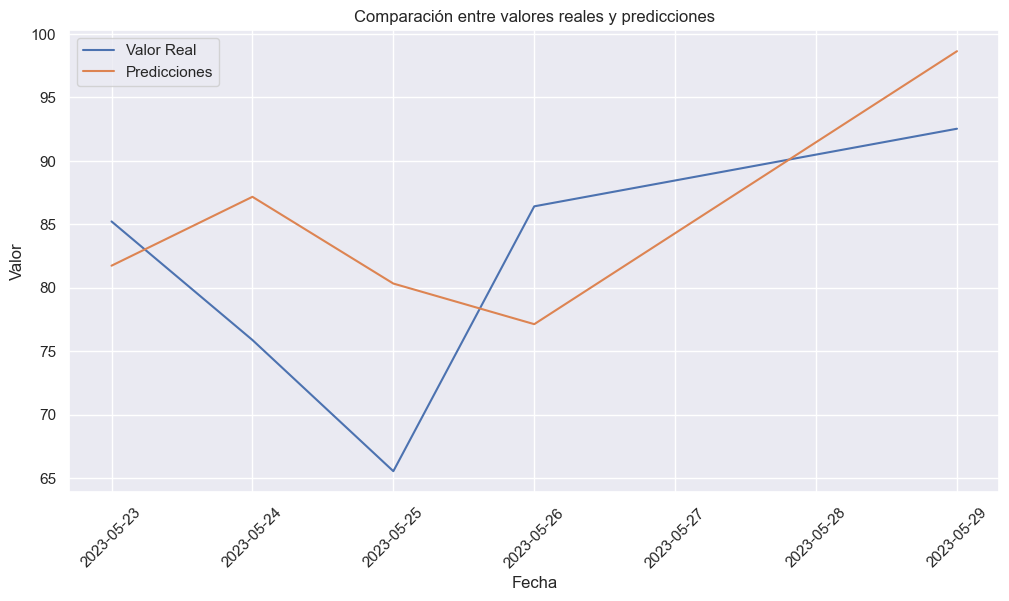

In [54]:


# Crear un DataFrame con las fechas, valores reales y predicciones
df_predicciones = pd.DataFrame({'Fecha': fechas_prueba,
                               'Valor Real': y_test,
                               'Predicciones': predicciones})

# Configurar estilo de seaborn
sns.set(style="darkgrid")

# Crear el gráfico
plt.figure(figsize=(12, 6))
sns.lineplot(x='Fecha', y='Valor Real', data=df_predicciones, label='Valor Real')
sns.lineplot(x='Fecha', y='Predicciones', data=df_predicciones, label='Predicciones')

# Configurar etiquetas y título del gráfico
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.title('Comparación entre valores reales y predicciones')

# Rotar las etiquetas del eje x para mejorar la legibilidad
plt.xticks(rotation=45)

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.show()


### Preparando el datframe de predicciones

In [79]:
preds = pd.read_csv('clean_data/preds.csv')
preds['Date'] = pd.to_datetime(preds['Date'])


In [80]:
# Cambiar los nombres de las columnas
preds = preds.rename(columns={'GasN_pred': 'GasNatural', 'CO2_pred': 'CO2'})

# Extraer las columnas 'Month', 'Weekday' y 'Year' a partir de la columna 'Date'
preds['Month'] = preds['Date'].dt.month
preds['Weekday'] = preds['Date'].dt.weekday
preds['Year'] = preds['Date'].dt.year


In [81]:
columnas_ordenadas = ['Date', 'Demanda', 'GasNatural', 'Uranio', 'Hidráulica', 'Eólica', 'Otras renovables', 'Residuos renovables', 'Solar', 'value', 'weekend', 'CO2', 'Month', 'Weekday', 'Year']

# Reordenar las columnas
preds = preds.reindex(columns=columnas_ordenadas)





In [83]:
pred_features = preds.drop('value', axis=1)

In [84]:

predictions = modelo_final.predict(X=pred_features)

df_predictions = pd.DataFrame({
    'Date': preds['Date'],
    'Valor Real': preds['value'],
    'Predicciones': predictions
})




In [89]:
preds['value'].fillna(df_predictions['Predicciones'], inplace=True)


In [92]:
final = pd.concat([merged_df, preds], ignore_index=True)


In [93]:
final.drop("weekend", axis=1, inplace=True)

,Date,Demanda,GasNatural,Uranio,Hidráulica,Eólica,Otras renovables,Residuos renovables,Solar,value,CO2,Month,Weekday,Year
0,2020-01-02,723.522375,0.801905,0.930000,159.171675,77.426389,8.407882,2.115271,22.901504,39.506250,24.900000,1,3,2020
1,2020-01-03,754.645342,0.841552,0.910000,151.996921,84.099112,8.992384,2.115966,18.079815,35.670833,25.500000,1,4,2020
2,2020-01-06,630.259532,0.889355,0.900000,130.350192,50.242116,10.472046,2.336038,31.064896,47.012500,24.740000,1,0,2020
3,2020-01-07,789.031621,0.897526,0.890000,145.618109,55.450866,10.822991,2.324326,33.174450,46.806250,25.060000,1,1,2020
4,2020-01-08,820.143678,0.871107,0.910000,148.928277,59.253662,11.451666,1.871002,32.108743,44.205833,24.600000,1,2,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,2023-06-05,601.494086,2.243734,3.116109,50.469984,141.122396,9.315062,1.743286,139.216105,68.667181,85.112457,6,0,2023
885,2023-06-06,621.627924,2.354160,3.117643,55.099757,130.055159,9.465616,1.753773,138.307860,68.567338,81.178329,6,1,2023
886,2023-06-07,624.767784,2.332626,3.120028,56.717961,120.270818,9.519234,1.782306,140.344034,69.543561,81.032890,6,2,2023
887,2023-06-08,623.109586,2.402037,3.106986,55.435506,126.186242,9.620559,1.811635,140.449533,70.435904,80.699417,6,3,2023
